Analisando padrões de consumo de energia...


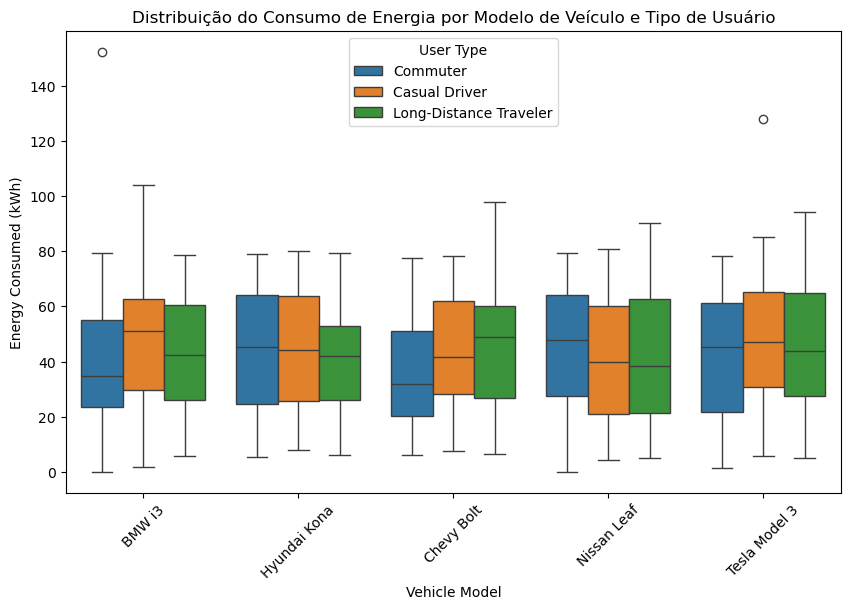

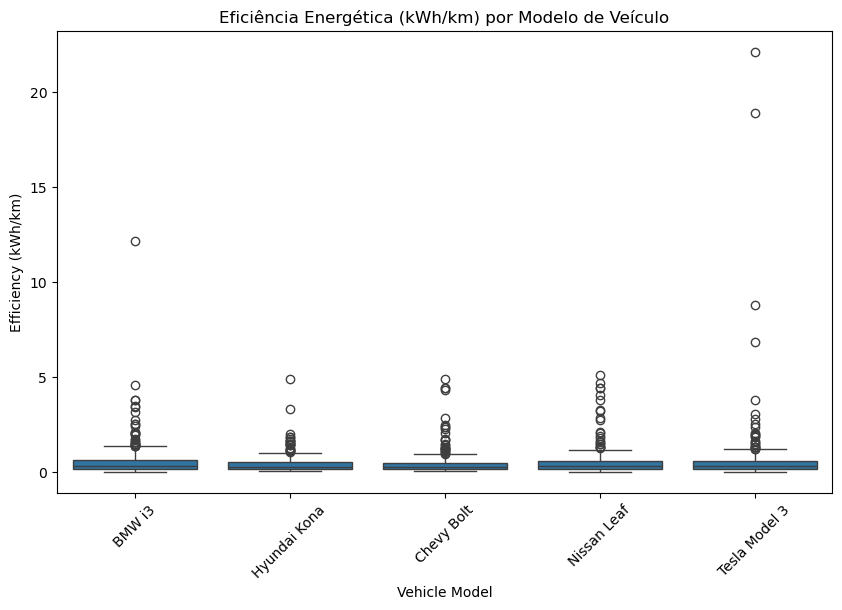

Analisando custos de carregamento...


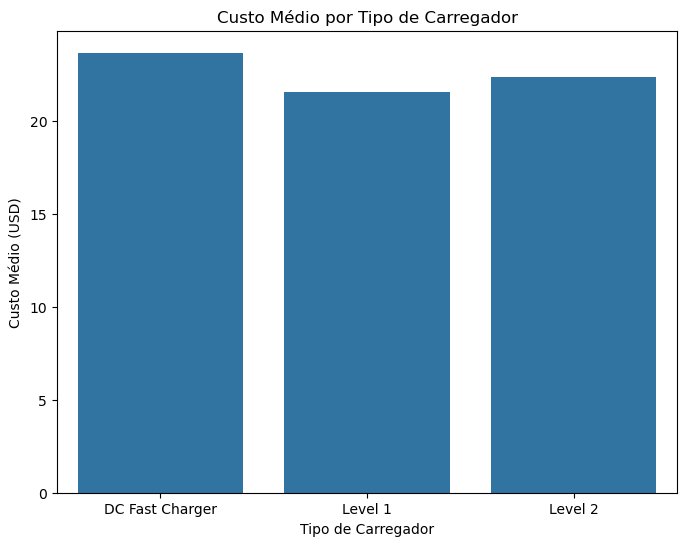

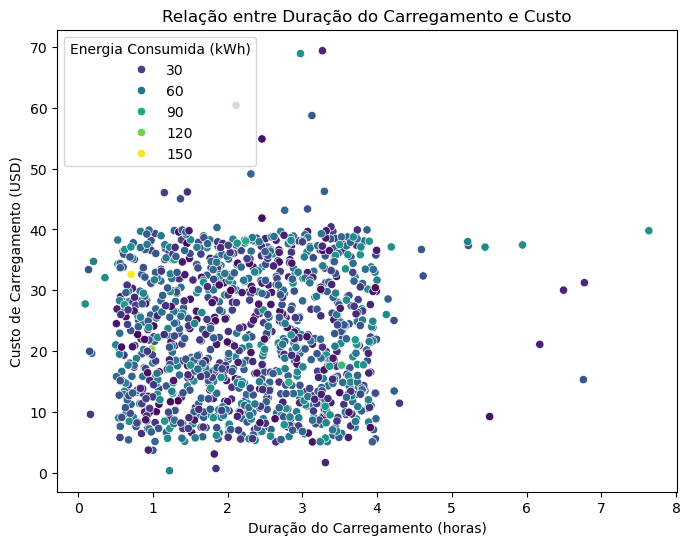

Treinando e avaliando modelos de previsão...
Mean Squared Error (Random Forest): 529.7600352589011
R-squared (Random Forest): -0.012354121527826223


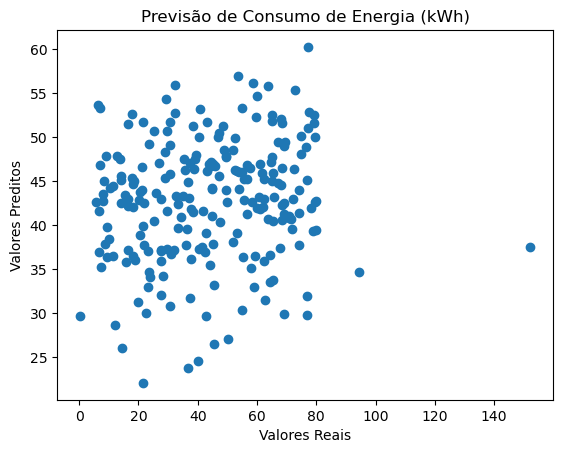

Mean Squared Error (Gradient Boosting): 555.762562977968
R-squared (Gradient Boosting): -0.062044102565512516


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Função para carregar e limpar os dados
def load_and_clean_data(filepath):
    df = pd.read_csv(filepath)
    df = df.dropna()  # Remover valores ausentes
    df = df.drop('User ID', axis=1)  # Excluir coluna de identificação do usuário
    return df

# Função para realizar a análise de padrões de consumo de energia
def analyze_energy_consumption(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Vehicle Model', y='Energy Consumed (kWh)', hue='User Type')
    plt.title('Distribuição do Consumo de Energia por Modelo de Veículo e Tipo de Usuário')
    plt.xticks(rotation=45)
    plt.show()

    # Calcular a eficiência energética (kWh/km)
    df['Efficiency (kWh/km)'] = df['Energy Consumed (kWh)'] / df['Distance Driven (since last charge) (km)']

    # Visualizar a eficiência energética por modelo de veículo
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Vehicle Model', y='Efficiency (kWh/km)')
    plt.title('Eficiência Energética (kWh/km) por Modelo de Veículo')
    plt.xticks(rotation=45)
    plt.show()

# Função para realizar a análise de custos de carregamento
def analyze_charging_costs(df):
    # Comparar custos médios por tipo de carregador
    avg_cost_per_charger = df.groupby('Charger Type')['Charging Cost (USD)'].mean().reset_index()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Charger Type', y='Charging Cost (USD)', data=avg_cost_per_charger)
    plt.title('Custo Médio por Tipo de Carregador')
    plt.xlabel('Tipo de Carregador')
    plt.ylabel('Custo Médio (USD)')
    plt.show()

    # Gráfico de dispersão entre Duração do Carregamento e Custo
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Charging Duration (hours)', y='Charging Cost (USD)', hue='Energy Consumed (kWh)', data=df, palette='viridis')
    plt.title('Relação entre Duração do Carregamento e Custo')
    plt.xlabel('Duração do Carregamento (horas)')
    plt.ylabel('Custo de Carregamento (USD)')
    plt.legend(title='Energia Consumida (kWh)', loc='upper left')
    plt.show()

# Função para treinar e avaliar modelos de previsão
def train_and_evaluate_models(df):
    # Prever consumo de energia
    X_energy = df[['Temperature (°C)', 'State of Charge (Start %)', 'Distance Driven (since last charge) (km)', 'Charging Duration (hours)']]
    y_energy = df['Energy Consumed (kWh)']
    
    # Dividir dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)
    
    # Modelo Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print(f'Mean Squared Error (Random Forest): {mse_rf}')
    print(f'R-squared (Random Forest): {r2_rf}')

    # Visualizar previsões
    plt.scatter(y_test, y_pred_rf)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title('Previsão de Consumo de Energia (kWh)')
    plt.show()

    # Modelo Gradient Boosting
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)

    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
    print(f'R-squared (Gradient Boosting): {r2_gb}')

# Função para otimizar o modelo Random Forest com GridSearch
def optimize_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }

    rf_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')
    return grid_search.best_estimator_

# Função principal para execução do pipeline completo
def main(filepath):
    df = load_and_clean_data(filepath)
    
    print("Analisando padrões de consumo de energia...")
    analyze_energy_consumption(df)
    
    print("Analisando custos de carregamento...")
    analyze_charging_costs(df)
    
    print("Treinando e avaliando modelos de previsão...")
    train_and_evaluate_models(df)

if __name__ == '__main__':
    filepath = 'data/ev_charging_patterns.csv'  # Substitua com o caminho correto do arquivo de dados
    main(filepath)
